In [73]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
from data import *
from regression import *
from template import show

In [74]:
"""
Using powell dog leg algorithm to optimize function
@:param func -- function, that would be updated
@:param grad -- gradient of current function
@:param H -- Hessian of current function
@:param init_point -- start position/point
@:param delta -- trust region
@:param eps -- minimal step, if the step is smaller then minimization stops
@:param max_iter -- maximal count of iterations 
"""
def powell_dog_leg(func, grad, H, init_point, delta, eps, max_iter):
    point = init_point
    
    for i in range(max_iter):
        g = grad(point)
        B = H(point)
        p = -inv(B).dot(g)
        
        if norm(p) > delta:
            pu = -g.dot(g) / g.dot(B.dot(g)) * g
            
            if norm(pu) <= delta:
                D = (delta * norm(pu - p)) ** 2 + p.dot(pu) ** 2 - (norm(pu) * norm(p)) ** 2
                s = (p.dot(p - pu) - np.sqrt(D)) / norm(pu - p) ** 2
                p = s * pu + (1 - s) * p
            else:
                p = pu * delta / norm(pu)
            
        point += p
        
        if norm(p) < eps:
            break
    
    return point

In [75]:
# init_point = np.array([0.65, 0.65])
# powell_dog_leg(f, g, H, init_point, 0.5, 0.05, 30)

In [76]:
def square_regression(r, grad, H, init_point, delta, eps, max_iter):
    return powell_dog_leg(r, grad, H, init_point, delta, eps, max_iter)

In [77]:
def create_test(func, jacobian, grad, hess):
    def run(x: np.ndarray, y: np.ndarray, st: np.ndarray, delta: float, eps: float, max_iter: int):
        r = regression(func, x, y)
        return square_regression(r, grad(x, jacobian, r), hess(x, jacobian), st, delta, eps, max_iter)
    return run

In [78]:
N = 21
start = [10, 0.5]

x, y = example.generate_test(np.exp, 0, 5, N)

In [79]:
func, jac = funcs["exp"]
func1, jac1 = funcs["pol"]

test = create_test(func, jac, grad, hessian)
test1 = create_test(func1, jac1, grad, hessian)
betta = test(x, y, start, 0.5, 0.05, 30)
# betta = square_regression(f, x, y, g, H, start, 0.5, 0.05, 30)

X = np.linspace(0, 5, N)
Y = func(X)(betta)
print(start, betta)

[10, 0.5] [0.99703552 1.00109379]


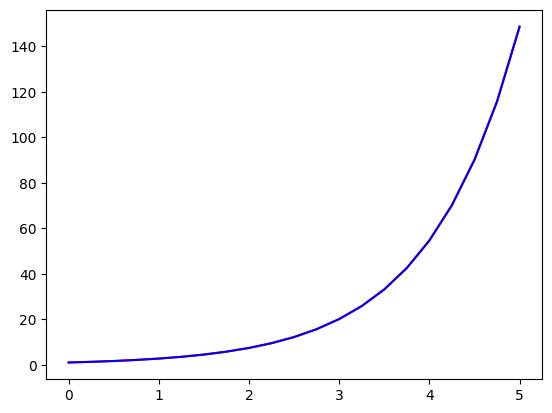

In [80]:
show(x, y, X, Y)

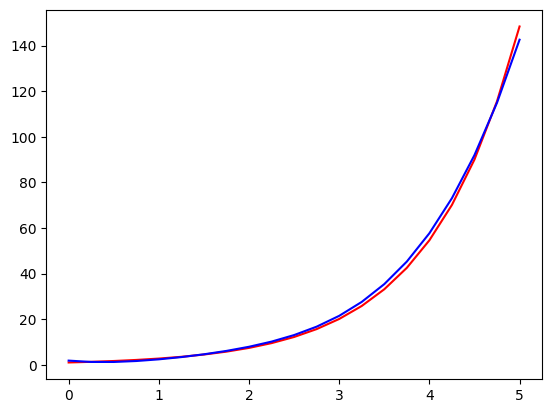

In [81]:
betta1 = test1(x, y, [2, 0.5, 0.5, 4, 5], 0.5, 0.05, 30)
X1 = np.linspace(0, 5, N)
Y1 = func1(X1)(betta1)
show(x, y, X1, Y1)